In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeRegressor 

In [2]:
df = pd.read_excel("Sales.xlsx", sheet_name='Sales')

In [3]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [4]:
df.tail()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0
4519,7004519,4764,14.0,10.0,Agent,Salaried,Under Graduate,Female,5,Manager,2.0,Married,23820.0,0,3.0,700308.0,North,Half Yearly,1,3.0


### 2) Visual inspection of data (rows, columns, descriptive details) and Understanding of attributes (variable info, renaming if required)

In [5]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [6]:
#checking data types
df.dtypes


CustID                    int64
AgentBonus                int64
Age                     float64
CustTenure              float64
Channel                  object
Occupation               object
EducationField           object
Gender                   object
ExistingProdType          int64
Designation              object
NumberOfPolicy          float64
MaritalStatus            object
MonthlyIncome           float64
Complaint                 int64
ExistingPolicyTenure    float64
SumAssured              float64
Zone                     object
PaymentMethod            object
LastMonthCalls            int64
CustCareScore           float64
dtype: object

In [7]:
#checking Shape
df.shape

(4520, 20)

In [8]:
#Checking the summary
df.describe()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4.520000e+03,4520.000000,4251.000000,4294.000000,4520.000000,4475.000000,4284.000000,4520.000000,4336.000000,4.366000e+03,4520.000000,4468.000000
mean,7.002260e+06,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,4.626991,3.067592
std,1.304956e+03,1403.321711,9.037629,8.963671,1.015769,1.455926,4885.600757,0.452491,3.346386,2.462348e+05,3.620132,1.382968
min,7.000000e+06,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,7.001130e+06,3027.750000,7.000000,7.000000,3.000000,2.000000,19683.500000,0.000000,2.000000,4.394432e+05,2.000000,2.000000
50%,7.002260e+06,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,7.003389e+06,4867.250000,20.000000,20.000000,4.000000,5.000000,24725.000000,1.000000,6.000000,7.582360e+05,8.000000,4.000000
max,7.004519e+06,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


#### 3) Exploratory data analysis


#### a) Univariate analysis 

Univariate analysis is basically the simplest form to analyze data. Uni means one and this means that the data has only one kind of variable. The major reason for univariate analysis is to use the data to describe.

We are using histogram for univariate analysis and bin in histogram is capable of showing the number of data positions, the range, or the interval.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEF5BD38C8>,
      dtype=object)

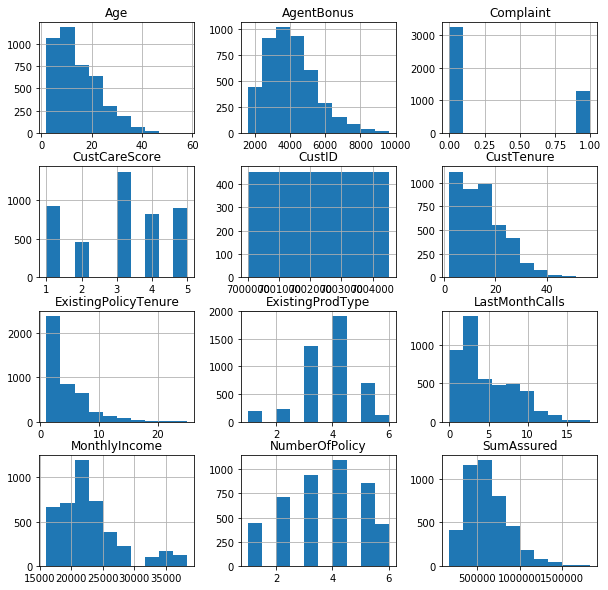

In [9]:
#plotting histogram 
df.hist(figsize=(10,10))

Here we can analaze that maximum customers are of age range between 2-20 years , Bonus given to maximum agents are between 3000 to 5000, No Complaint registered for maximum agents, overall satisfaction rating is 3 given by maximum customer in previous service call. 

#### b) Bivariate analysis (relationship between different variables , correlations)

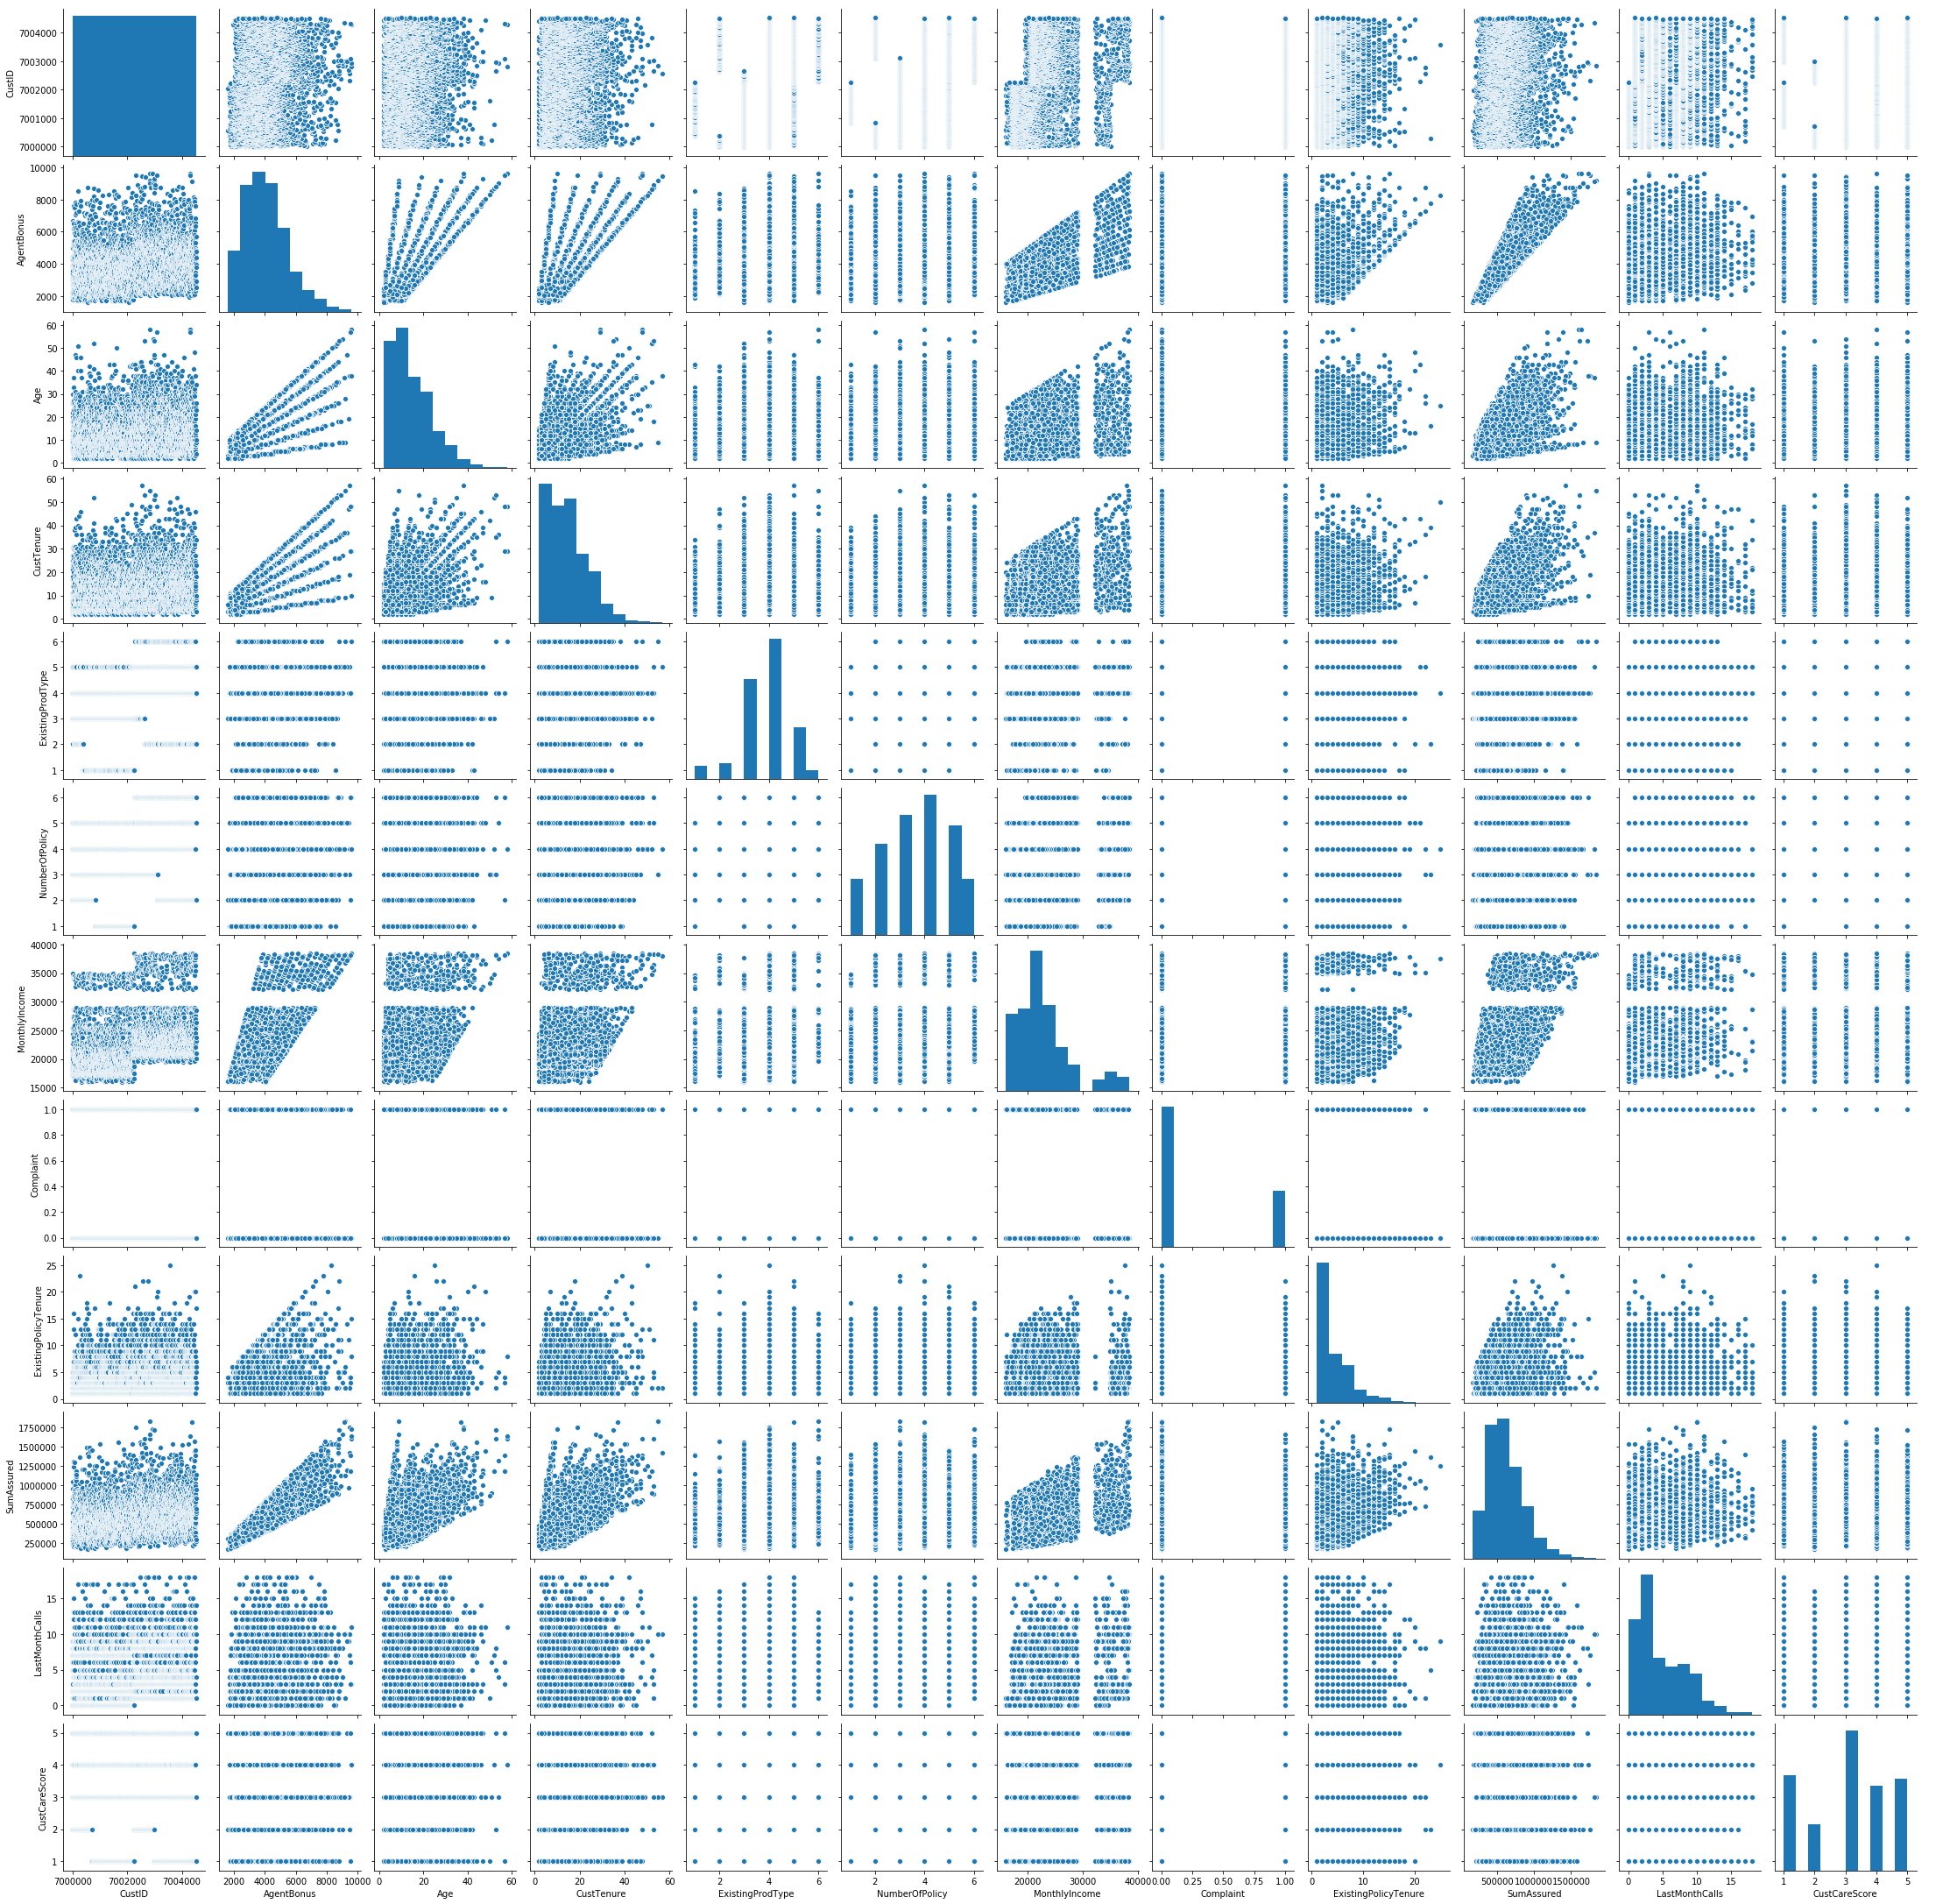

In [10]:
### Checking pairwise distribution 
sns.pairplot(df)

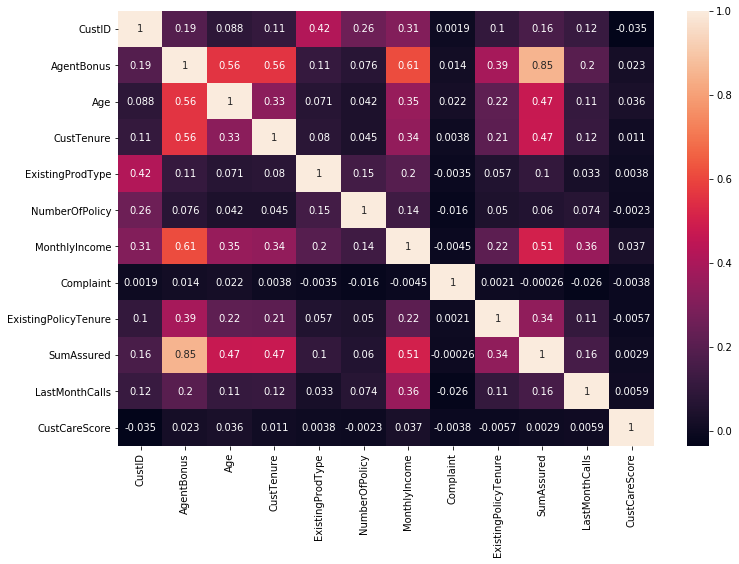

In [11]:
#Correlation Matrix
fig , ax =plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),ax=ax,annot=True)

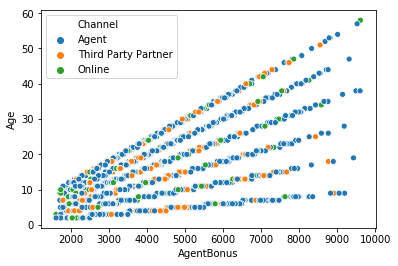

In [12]:
sns.scatterplot(x='AgentBonus', y = 'Age', hue = 'Channel',data = df)

We can see from above graph customer whose age is between 2-10 years have maximum Agentbonus and through Agent Channel acquisition of customer is done maximum.

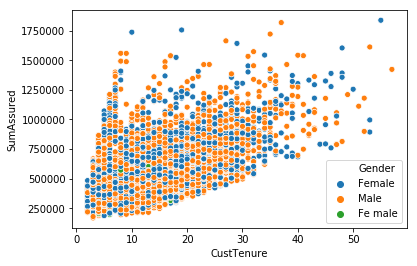

In [13]:
sns.scatterplot(x='CustTenure', y = 'SumAssured', hue = 'Gender',data = df)

we can see from above graph SumAssured and CustTenure is highly correlated.
Male have maximum SumAssured than Female.

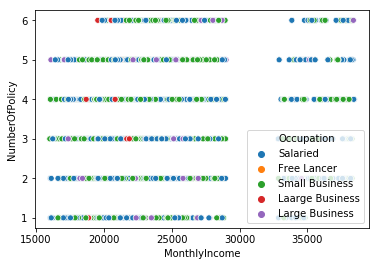

In [14]:
sns.scatterplot(x='MonthlyIncome', y = 'NumberOfPolicy', hue = 'Occupation',data = df)

Here from above graph we can see maximum customer have NumberofPolicy 4 with maximum MonthlyIncome.
Maximum Customer have occupation as salaried who have NumberofPolicy 4.

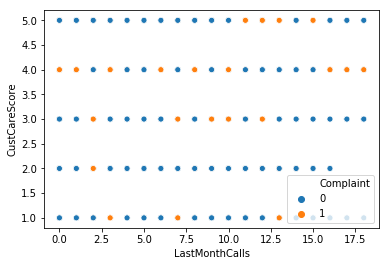

In [15]:
sns.scatterplot(x='LastMonthCalls', y = 'CustCareScore', hue = 'Complaint',data = df)

Here we can see whose Customer satisfaction score given by customer in previous service call is 3 have minimum number of complain.

In [16]:
##Checking for duplicate value and revoming them
dups1 = df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups1.sum()))

Number of duplicate rows = 0


In [17]:
### Removing the Id
df.drop(columns="CustID", inplace = True)
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [18]:
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


##### Missing Value treatment (if applicable)

In [19]:
df.isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [20]:
#imputing null value
df['Age'] =  df['Age'].fillna(df['Age'].median())
df['CustTenure'] =  df['CustTenure'].fillna(df['CustTenure'].median())
df['MonthlyIncome'] =  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['ExistingPolicyTenure'] =  df['ExistingPolicyTenure'].fillna(df['ExistingPolicyTenure'].median())
df['SumAssured'] =  df['SumAssured'].fillna(df['SumAssured'].median())
df['NumberOfPolicy'] =  df['NumberOfPolicy'].fillna(df['NumberOfPolicy'].median())
df['CustCareScore'] =  df['NumberOfPolicy'].fillna(df['NumberOfPolicy'].median())

 Median is more robust, not sensitive to outliers, and thus used when data is skewed so i m using median value to replace the missing values

In [21]:
#Rechecking null value
df.isnull().sum()

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [22]:
df['Gender'] = df['Gender'].replace("Fe male", "Female")

In [23]:
df['Gender']

0       Female
1         Male
2         Male
3       Female
4         Male
         ...  
4515      Male
4516    Female
4517    Female
4518    Female
4519    Female
Name: Gender, Length: 4520, dtype: object

In [24]:
df['Occupation'] = df['Occupation'].replace("Laarge Business", "Large Business")

In [25]:
df['Occupation']

0             Salaried
1             Salaried
2          Free Lancer
3             Salaried
4       Small Business
             ...      
4515    Small Business
4516          Salaried
4517          Salaried
4518    Small Business
4519          Salaried
Name: Occupation, Length: 4520, dtype: object

#### Outlier treatment

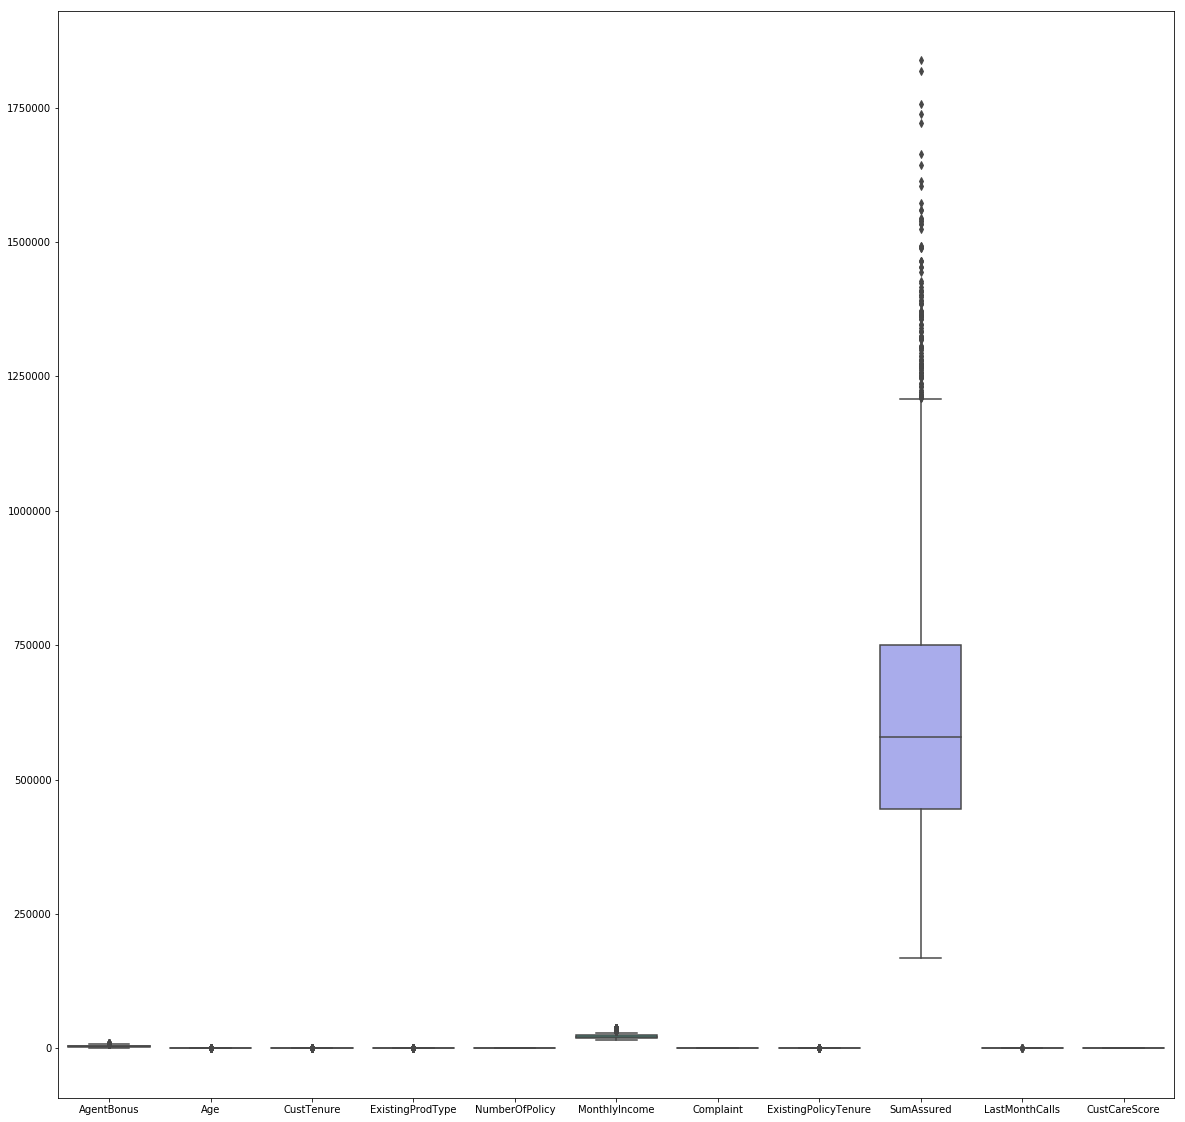

In [26]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df)

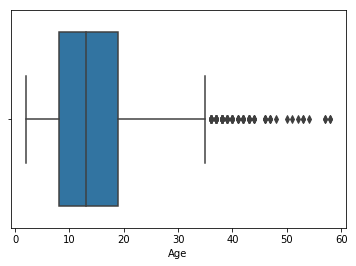

In [27]:
sns.boxplot(df['Age'])

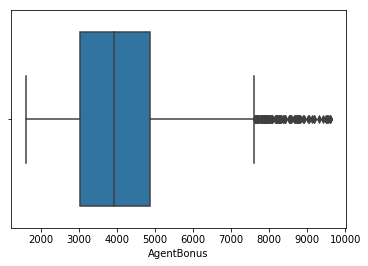

In [28]:
sns.boxplot(df['AgentBonus'])

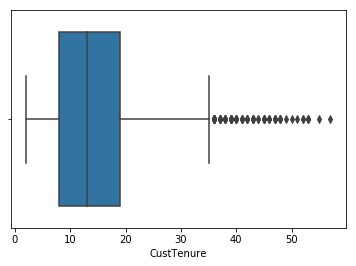

In [29]:
sns.boxplot(df['CustTenure'])

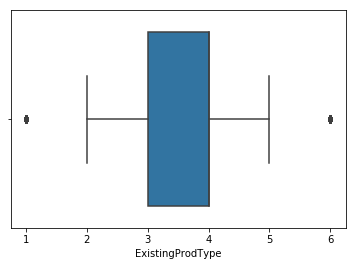

In [30]:
sns.boxplot(df['ExistingProdType'])

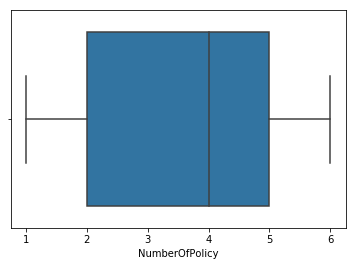

In [31]:
sns.boxplot(df['NumberOfPolicy'])

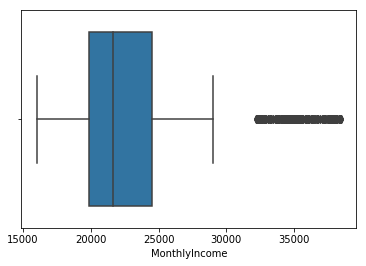

In [32]:
sns.boxplot(df['MonthlyIncome'])

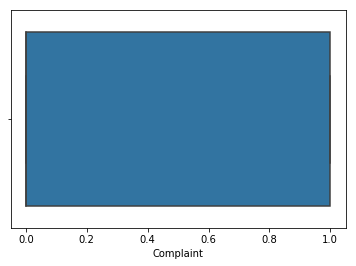

In [33]:
sns.boxplot(df['Complaint'])

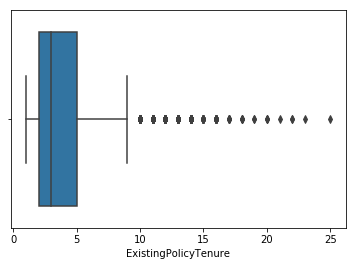

In [34]:
sns.boxplot(df['ExistingPolicyTenure'])

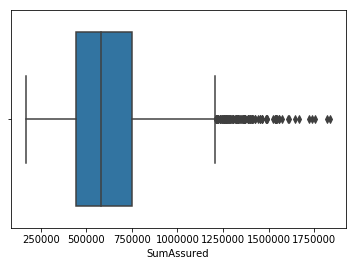

In [35]:
sns.boxplot(df['SumAssured'])

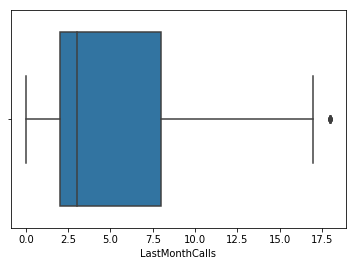

In [36]:
sns.boxplot(df['LastMonthCalls'])

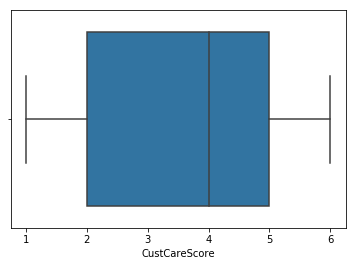

In [37]:
sns.boxplot(df['CustCareScore'])

As we can see there is outliers using boxplot so willl treat them

In [38]:
#Treating Outliers
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [39]:
for feature in df[['Age','AgentBonus','CustTenure','ExistingProdType','NumberOfPolicy','MonthlyIncome','Complaint','ExistingPolicyTenure','SumAssured','LastMonthCalls','CustCareScore']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

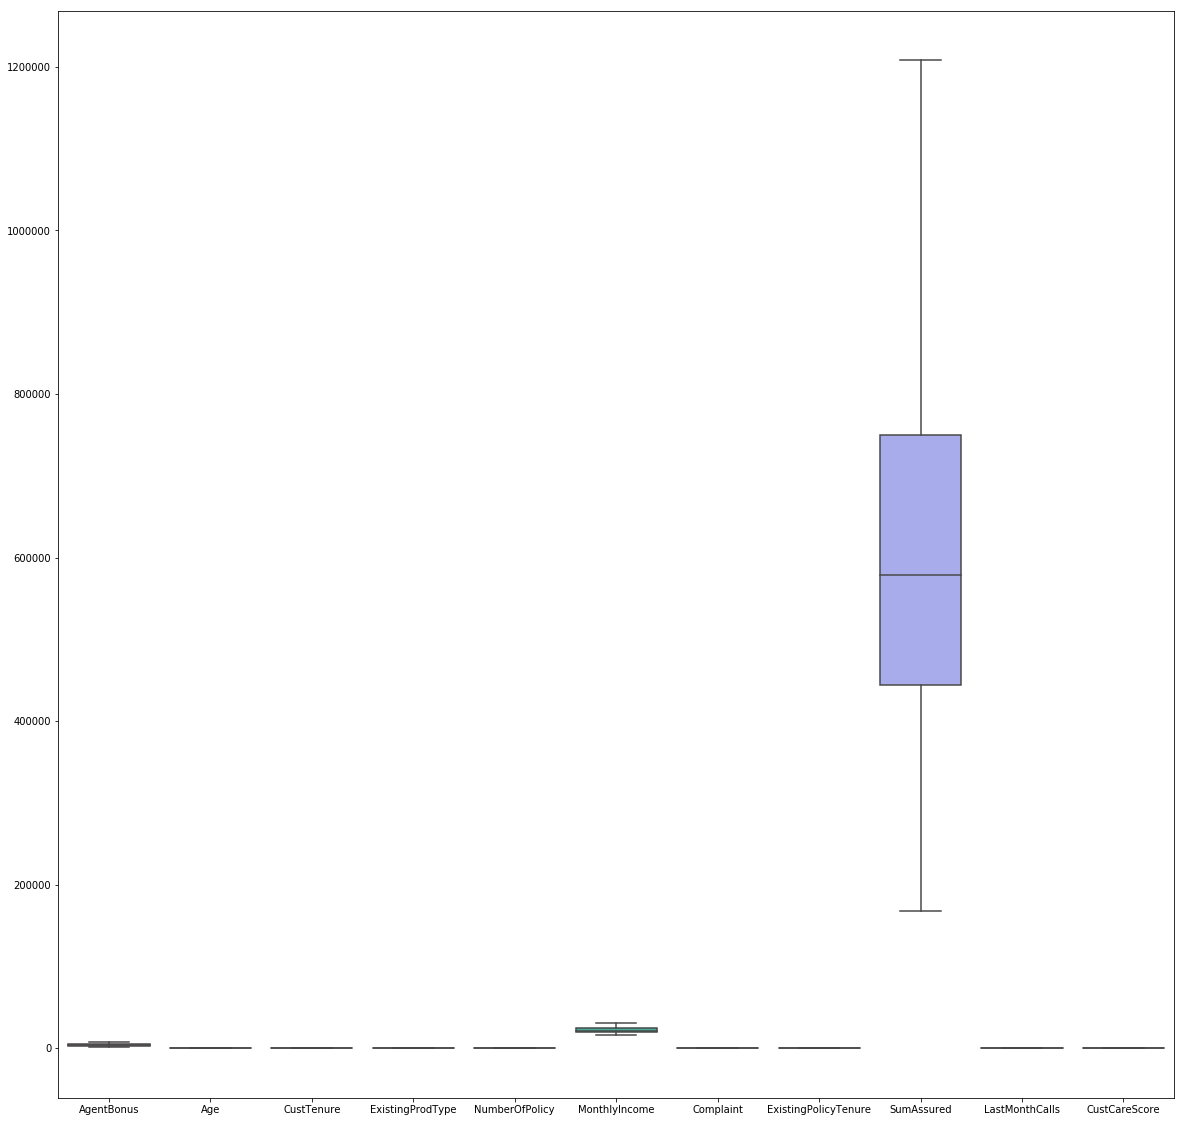

In [40]:
#Rechecking data after removing outliers
plt.figure(figsize=(20,20))
sns.boxplot(data=df)

##### Variable transformation (if applicable)

#### Converting all objects to categorical codes

In [41]:
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409.0,22.0,4.0,Agent,Salaried,Graduate,Female,3.0,Manager,2.0,Single,20993.0,1.0,2.0,806761.0,North,Half Yearly,5.0,2.0
1,2214.0,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4.0,Manager,4.0,Divorced,20130.0,0.0,3.0,294502.0,North,Yearly,7.0,4.0
2,4273.0,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4.0,Exe,3.0,Unmarried,17090.0,1.0,2.0,578976.5,North,Yearly,0.0,3.0
3,1791.0,11.0,13.0,Third Party Partner,Salaried,Graduate,Female,3.0,Executive,3.0,Divorced,17909.0,1.0,2.0,268635.0,West,Half Yearly,0.0,3.0
4,2955.0,6.0,13.0,Agent,Small Business,UG,Male,3.0,Executive,4.0,Divorced,18468.0,0.0,4.0,366405.0,West,Half Yearly,2.0,4.0


For some variables like EducationField,Designation,MaritalStatus will perform label encoding technique for handling categorical variable

##### Label Encoding

In [42]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'EducationField'. 
df['EducationField']= label_encoder.fit_transform(df['EducationField'])
df['Designation']= label_encoder.fit_transform(df['Designation'])
df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus'])
df

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409.0,22.0,4.0,Agent,Salaried,2,Female,3.0,3,2.0,2,20993.0,1.0,2.0,806761.0,North,Half Yearly,5.0,2.0
1,2214.0,11.0,2.0,Third Party Partner,Salaried,2,Male,4.0,3,4.0,0,20130.0,0.0,3.0,294502.0,North,Yearly,7.0,4.0
2,4273.0,26.0,4.0,Agent,Free Lancer,4,Male,4.0,1,3.0,3,17090.0,1.0,2.0,578976.5,North,Yearly,0.0,3.0
3,1791.0,11.0,13.0,Third Party Partner,Salaried,2,Female,3.0,2,3.0,0,17909.0,1.0,2.0,268635.0,West,Half Yearly,0.0,3.0
4,2955.0,6.0,13.0,Agent,Small Business,5,Male,3.0,2,4.0,0,18468.0,0.0,4.0,366405.0,West,Half Yearly,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,3953.0,4.0,8.0,Agent,Small Business,2,Male,4.0,4,2.0,2,26355.0,0.0,2.0,636473.0,West,Yearly,9.0,2.0
4516,2939.0,9.0,9.0,Agent,Salaried,6,Female,2.0,2,2.0,1,20991.0,0.0,3.0,296813.0,North,Yearly,1.0,2.0
4517,3792.0,23.0,23.0,Agent,Salaried,1,Female,5.0,0,5.0,2,21606.0,0.0,2.0,667371.0,North,Half Yearly,4.0,5.0
4518,4816.0,10.0,10.0,Online,Small Business,2,Female,4.0,2,2.0,2,20068.0,0.0,6.0,943999.0,West,Half Yearly,1.0,2.0


For rest variables will perform one hot encoding One-Hot-Encoding is used to create dummies variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record

##### One-Hot Encoding

In [43]:
df_dummies= pd.get_dummies(df, prefix='Channel', columns=['Channel']) #This function does One-Hot-Encoding on categorical text

In [44]:
df_dummies1= pd.get_dummies(df_dummies, prefix='Occupation', columns=['Occupation']) 

In [45]:
df_dummies2= pd.get_dummies(df_dummies1, prefix='Gender', columns=['Gender'])

In [46]:
df_dummies3= pd.get_dummies(df_dummies2, prefix='Zone', columns=['Zone']) 

In [47]:
df_dummies4= pd.get_dummies(df_dummies3, prefix='Payment', columns=['PaymentMethod']) 

In [48]:
df_dummies4

,AgentBonus,Age,CustTenure,EducationField,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,...,Gender_Female,Gender_Male,Zone_East,Zone_North,Zone_South,Zone_West,Payment_Half Yearly,Payment_Monthly,Payment_Quarterly,Payment_Yearly
0,4409.0,22.0,4.0,2,3.0,3,2.0,2,20993.0,1.0,...,1,0,0,1,0,0,1,0,0,0
1,2214.0,11.0,2.0,2,4.0,3,4.0,0,20130.0,0.0,...,0,1,0,1,0,0,0,0,0,1
2,4273.0,26.0,4.0,4,4.0,1,3.0,3,17090.0,1.0,...,0,1,0,1,0,0,0,0,0,1
3,1791.0,11.0,13.0,2,3.0,2,3.0,0,17909.0,1.0,...,1,0,0,0,0,1,1,0,0,0
4,2955.0,6.0,13.0,5,3.0,2,4.0,0,18468.0,0.0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,3953.0,4.0,8.0,2,4.0,4,2.0,2,26355.0,0.0,...,0,1,0,0,0,1,0,0,0,1
4516,2939.0,9.0,9.0,6,2.0,2,2.0,1,20991.0,0.0,...,1,0,0,1,0,0,0,0,0,1
4517,3792.0,23.0,23.0,1,5.0,0,5.0,2,21606.0,0.0,...,1,0,0,1,0,0,1,0,0,0
4518,4816.0,10.0,10.0,2,4.0,2,2.0,2,20068.0,0.0,...,1,0,0,0,0,1,1,0,0,0


In [49]:
columnsNamesArr= df_dummies4.columns.values
columnsNamesArr

array(['AgentBonus', 'Age', 'CustTenure', 'EducationField',
       'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls',
       'CustCareScore', 'Channel_Agent', 'Channel_Online',
       'Channel_Third Party Partner', 'Occupation_Free Lancer',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Female', 'Gender_Male',
       'Zone_East', 'Zone_North', 'Zone_South', 'Zone_West',
       'Payment_Half Yearly', 'Payment_Monthly', 'Payment_Quarterly',
       'Payment_Yearly'], dtype=object)

##### Clustering

In [50]:
from sklearn.cluster import KMeans a

In [51]:
#To find optimum number of clusters using elbow curve
k_means = KMeans(n_clusters = 2)

In [52]:
k_means.fit(df_dummies4)

KMeans(n_clusters=2)

In [53]:
k_means.labels_

array([0, 1, 1, ..., 1, 0, 0])

In [54]:
k_means.inertia_

79325166249430.19

In [55]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_dummies4)
k_means.inertia_

38422607683414.695

#### Calculating WSS for other values of K - Elbow Method

In [56]:
wss =[]

In [57]:
K = range(1, 11)
for i in K:
    KM = KMeans(n_clusters=i)
    KM.fit(df_dummies4)
    wss.append(KM.inertia_)

In [58]:
wss

[237787344636487.94,
 79324941287653.53,
 38422557460247.84,
 21564377511709.047,
 13888820548760.22,
 9444649953577.664,
 7045815509440.323,
 5378973327374.715,
 4162404762022.038,
 3462198011809.7]

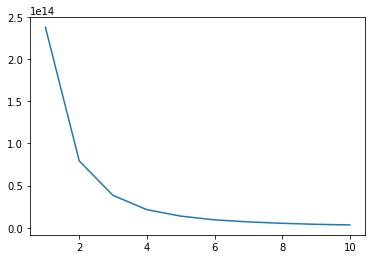

In [59]:
plt.plot(range(1,11), wss)

##### ElBow Medhod

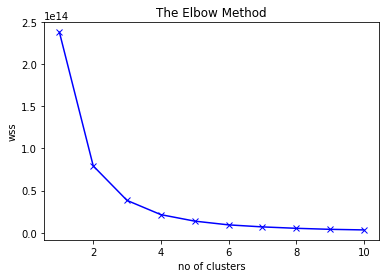

In [60]:
plt.plot(K, wss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wss')
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.So we can say that the optimal number of clusters is 3.

In [61]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_dummies4)
labels = k_means.labels_

In [62]:
df_dummies4["Clus_kmeans"] = labels
df_dummies4.head(5)

,AgentBonus,Age,CustTenure,EducationField,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,...,Gender_Male,Zone_East,Zone_North,Zone_South,Zone_West,Payment_Half Yearly,Payment_Monthly,Payment_Quarterly,Payment_Yearly,Clus_kmeans
0,4409.0,22.0,4.0,2,3.0,3,2.0,2,20993.0,1.0,...,0,0,1,0,0,1,0,0,0,1
1,2214.0,11.0,2.0,2,4.0,3,4.0,0,20130.0,0.0,...,1,0,1,0,0,0,0,0,1,0
2,4273.0,26.0,4.0,4,4.0,1,3.0,3,17090.0,1.0,...,1,0,1,0,0,0,0,0,1,1
3,1791.0,11.0,13.0,2,3.0,2,3.0,0,17909.0,1.0,...,0,0,0,0,1,1,0,0,0,0
4,2955.0,6.0,13.0,5,3.0,2,4.0,0,18468.0,0.0,...,1,0,0,0,1,1,0,0,0,0
